In [222]:
import tensorflow as tf

## Задание 1

In [223]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data3", # путь к изображениям
    validation_split=0.2, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(200,400), # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    batch_size=32, # размер пакета (батча)
)

Found 2000 files belonging to 2 classes.


Using 1600 files for training.
Using 400 files for validation.


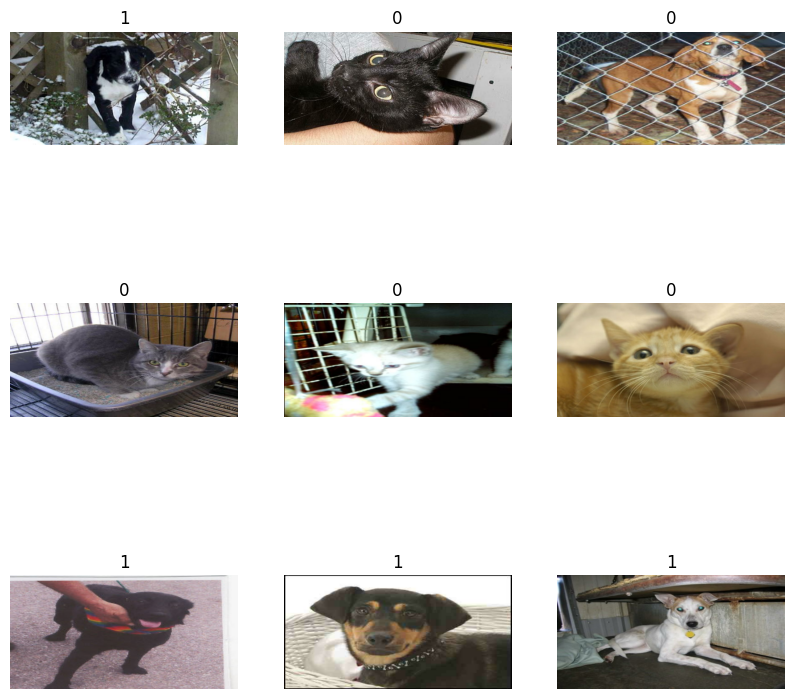

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [225]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

In [226]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [227]:
# входной слой - размер (200, 400, 3)
inputs = tf.keras.Input(shape=(200, 400, 3))
# преобразуем значения пикселей из [0, 255] к [0, 1]
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
# первый сверточный слой
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
# первый пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# второй сверточный слой
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
# второй пулинг
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
# выпрямляем многомерный массив
x = tf.keras.layers.Flatten()(x)
# полносвязный слой с 64 нейронами
x = tf.keras.layers.Dense(64, activation="relu")(x)
# выходной слой с функцией sofrmax
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [228]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [229]:
model.fit(train_ds, epochs=3, validation_data=test_ds)

Epoch 1/3
50/50 [==============================] - 21s 401ms/step - loss: 0.9216 - accuracy: 0.5050 - val_loss: 0.6818 - val_accuracy: 0.5475
Epoch 2/3
50/50 [==============================] - 20s 395ms/step - loss: 0.6706 - accuracy: 0.5619 - val_loss: 0.6243 - val_accuracy: 0.6425
Epoch 3/3
50/50 [==============================] - 20s 391ms/step - loss: 0.6488 - accuracy: 0.6219 - val_loss: 0.6664 - val_accuracy: 0.6400


In [230]:
# Оценка модели на тестовых данных
test_loss, test_accuracy = model.evaluate(train_ds)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

50/50 [==============================] - 14s 271ms/step - loss: 0.6646 - accuracy: 0.6106
Test loss: 0.6646
Test accuracy: 0.6106


In [239]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data3/dogs/8.jpg", target_size=(200, 400)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 26ms/step


array([[0.27819893, 0.72180104]], dtype=float32)

## Задание 2

In [264]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data4", # путь к изображениям
    validation_split=0.2, # процент на тест
    subset="both", # берем и обучающую и тестовую выборку
    seed=42, # сид генератора случайных чисел
    image_size=(400,400), # целевой размер изображения (СНАЧАЛА ВЫСОТА, ПОТОМ ШИРИНА)
    batch_size=32, # размер пакета (батча)
)

Found 945 files belonging to 3 classes.
Using 756 files for training.
Using 189 files for validation.


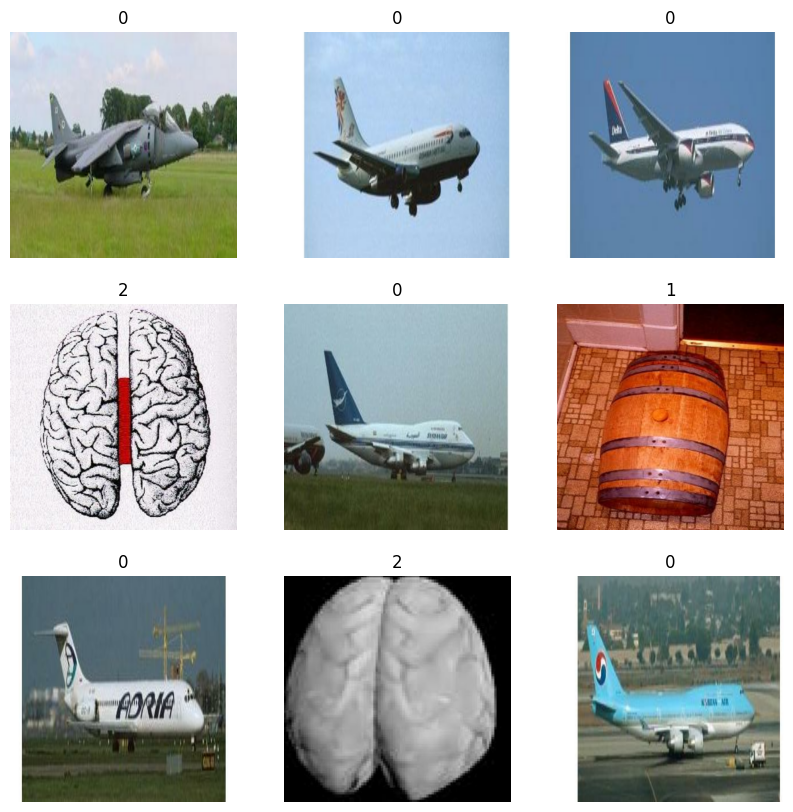

In [265]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
# берем один батч
for images, labels in train_ds.take(1):
    # отрисуем 9 картинок из батча
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # выводим картинку
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        # выключаем оси (чтобы они не отображались)
        plt.axis("off")

In [266]:
from tensorflow.keras.applications import InceptionV3, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [267]:
# Загрузка изображений из директории и применение аугментации
image_generator = image_datagen.flow_from_directory(
    '../data/data4',
    target_size=(400, 400),
    batch_size=32)

Found 945 images belonging to 3 classes.


In [268]:
base_model_inception = InceptionV3(include_top=False, weights='imagenet')

# Заморозка слоев модели InceptionV3
for layer in base_model_inception.layers:
    layer.trainable = False
base_model_inception.layers[-1].trainable = True

In [269]:
# Создание новой модели на основе предобученной InceptionV3
model_inception = Sequential()
model_inception.add(base_model_inception)
model_inception.add(GlobalAveragePooling2D())
model_inception.add(Dense(256, activation='relu'))
model_inception.add(Dense(3, activation='softmax'))

In [270]:
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_inception.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dense_66 (Dense)            (None, 256)               524544    
                                                                 
 dense_67 (Dense)            (None, 3)                 771       
                                                                 
Total params: 22328099 (85.17 MB)
Trainable params: 525315 (2.00 MB)
Non-trainable params: 21802784 (83.17 MB)
_________________________________________________________________


In [271]:
# Загрузка предобученной модели VGG19 без последнего слоя Dense
base_model_vgg = VGG19(include_top=False, weights='imagenet')

# Заморозка слоев модели VGG19
for layer in base_model_vgg.layers:
    layer.trainable = False
base_model_vgg.layers[-1].trainable = True

In [272]:
# Создание новой модели на основе предобученной VGG19
model_vgg = Sequential()
model_vgg.add(base_model_vgg)
model_vgg.add(GlobalAveragePooling2D())
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(Dense(3, activation='softmax'))

In [273]:
# Компиляция модели VGG19
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
 4 (GlobalAveragePooling2D)                                      
                                                                 
 dense_68 (Dense)            (None, 256)               131328    
                                                                 
 dense_69 (Dense)            (None, 3)                 771       
                                                                 
Total params: 20156483 (76.89 MB)
Trainable params: 132099 (516.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [274]:
history_inception = model_inception.fit(image_generator, epochs=1)
history_vgg = model_vgg.fit(image_generator, epochs=1)

30/30 [==============================] - 337s 11s/step - loss: 0.5931 - accuracy: 0.8138
